In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sinplot(flip = 1):
    x = np.linspace(0 , 14 , 200)
    for i in range(1,5):
        plt.plot(x , np.sin(x + i * 0.5)*(7-i)*flip)    

In [3]:
sns.set()

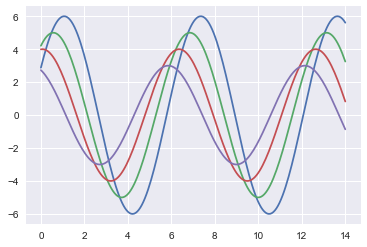

In [4]:
sinplot()

In [5]:
pokemon = pd.read_csv("Pokemon.csv",encoding='ISO-8859-1')
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


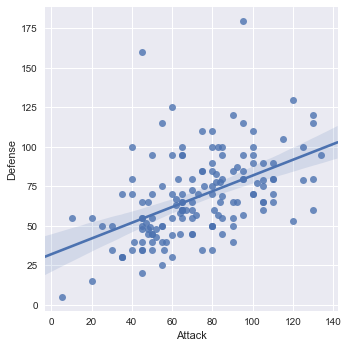

In [6]:
sns.lmplot(x='Attack',y='Defense',data=pokemon)

(0, 190.74184304559267)

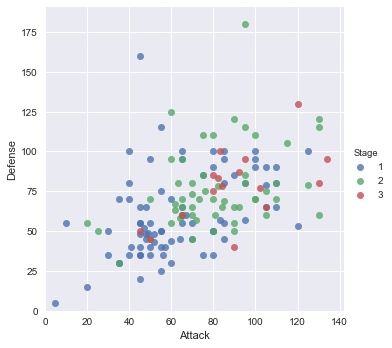

In [7]:
sns.lmplot(x='Attack',y='Defense',data=pokemon,
           fit_reg=False, #No regression line
           hue='Stage')
plt.xlim(0,None)
plt.ylim(0,None)

In [8]:
pokemon[pokemon['Defense'] > 160]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
90,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,2,False


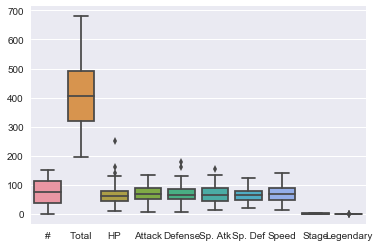

In [9]:
sns.boxplot(data=pokemon)

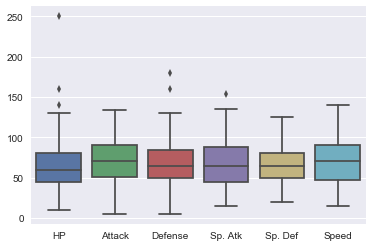

In [10]:
stats_df = pokemon.drop(['#','Total','Stage','Legendary'],axis=1)
sns.boxplot(data=stats_df)

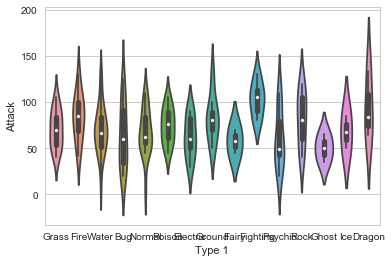

In [11]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=pokemon)
sns.set(rc={'figure.figsize':(13,9)})

In [12]:
pkmn_type_colors = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8',
'#7038F8']

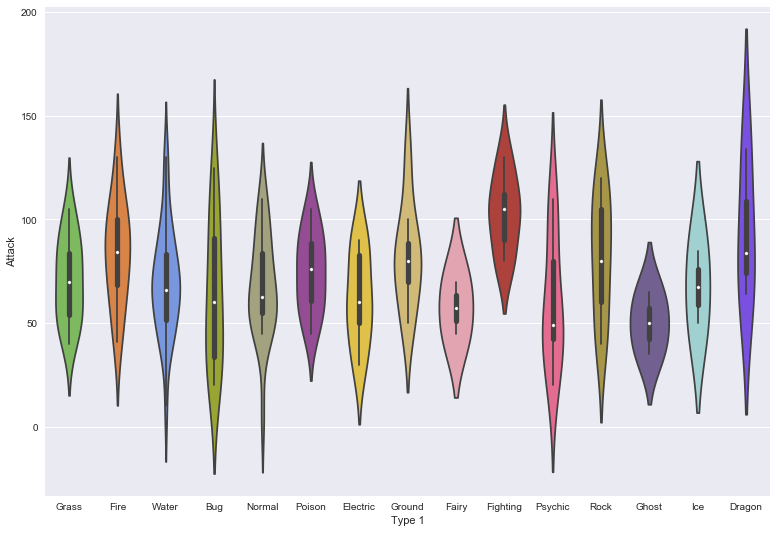

In [13]:
sns.violinplot(x='Type 1',y='Attack',data=pokemon,palette=pkmn_type_colors)

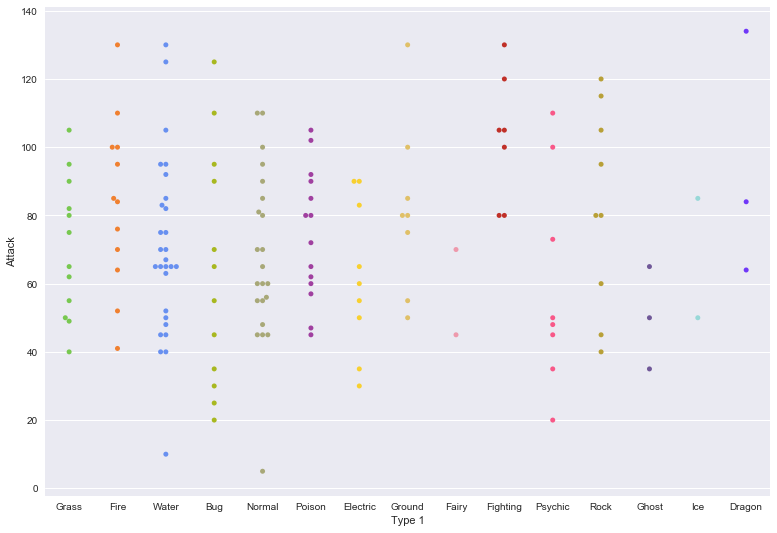

In [14]:
sns.swarmplot(x='Type 1',y='Attack',data=pokemon,palette=pkmn_type_colors)

In [15]:
melted_df = pd.melt(stats_df,id_vars=['Name','Type 1','Type 2'],var_name='Stat')
print(melted_df.head(20))
print(melted_df.shape)

          Name  Type 1  Type 2 Stat  value
0    Bulbasaur   Grass  Poison   HP     45
1      Ivysaur   Grass  Poison   HP     60
2     Venusaur   Grass  Poison   HP     80
3   Charmander    Fire     NaN   HP     39
4   Charmeleon    Fire     NaN   HP     58
5    Charizard    Fire  Flying   HP     78
6     Squirtle   Water     NaN   HP     44
7    Wartortle   Water     NaN   HP     59
8    Blastoise   Water     NaN   HP     79
9     Caterpie     Bug     NaN   HP     45
10     Metapod     Bug     NaN   HP     50
11  Butterfree     Bug  Flying   HP     60
12      Weedle     Bug  Poison   HP     40
13      Kakuna     Bug  Poison   HP     45
14    Beedrill     Bug  Poison   HP     65
15      Pidgey  Normal  Flying   HP     40
16   Pidgeotto  Normal  Flying   HP     63
17     Pidgeot  Normal  Flying   HP     83
18     Rattata  Normal     NaN   HP     30
19    Raticate  Normal     NaN   HP     55
(906, 5)


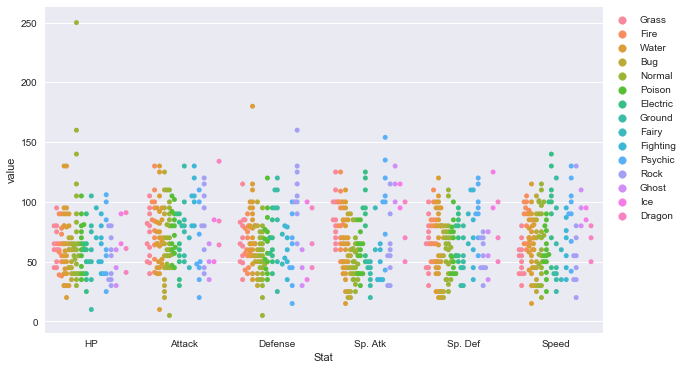

In [16]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat',y='value',data=melted_df,hue='Type 1',dodge=True)
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [17]:
corr = stats_df.corr()
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


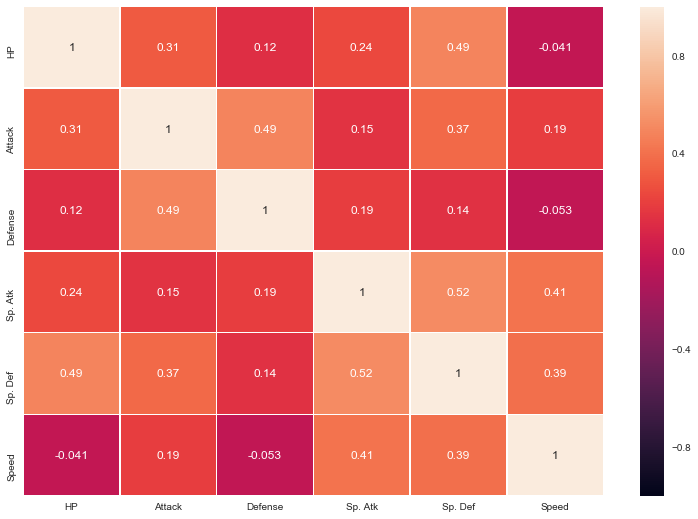

In [18]:
sns.heatmap(corr,annot=True,vmin=-1,linewidths=0.5)

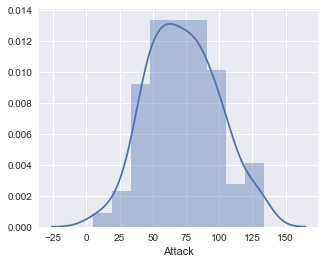

In [19]:
plt.figure(figsize=(5,4))
sns.distplot(stats_df.Attack)

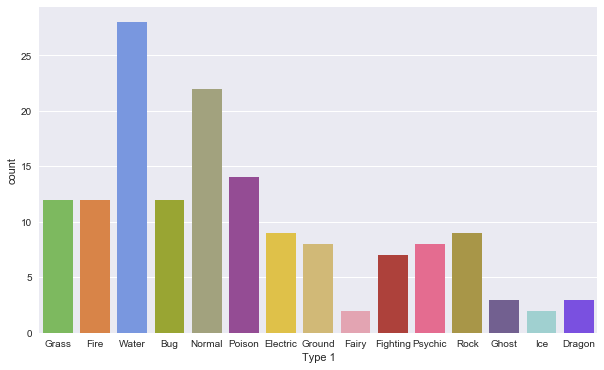

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type 1',data=pokemon,palette=pkmn_type_colors)

In [21]:
pokemon.sort_values('Attack').head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
128,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
62,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
10,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,2,False
13,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,2,False


<Container object of 15 artists>

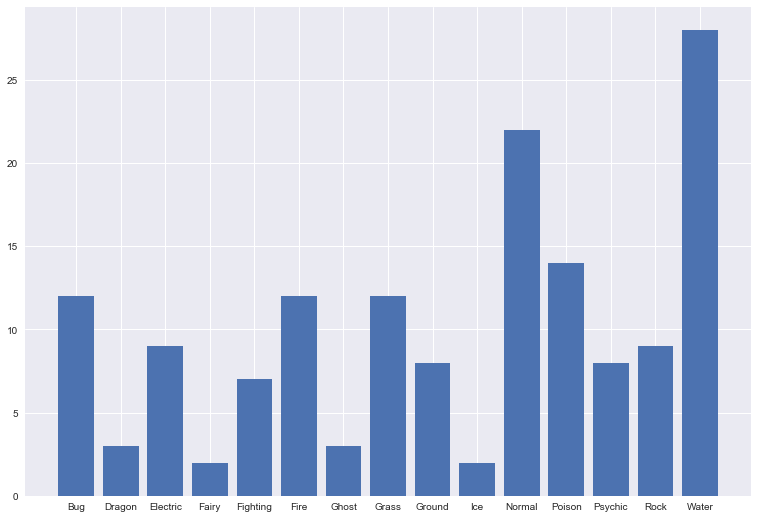

In [22]:
grpby_type = pokemon.groupby('Type 1',as_index=False)
byType = pd.DataFrame(grpby_type['Name'].count())
byType = byType.sort_values('Name')
byType
plt.bar(byType['Type 1'] , byType.Name , data=byType,)

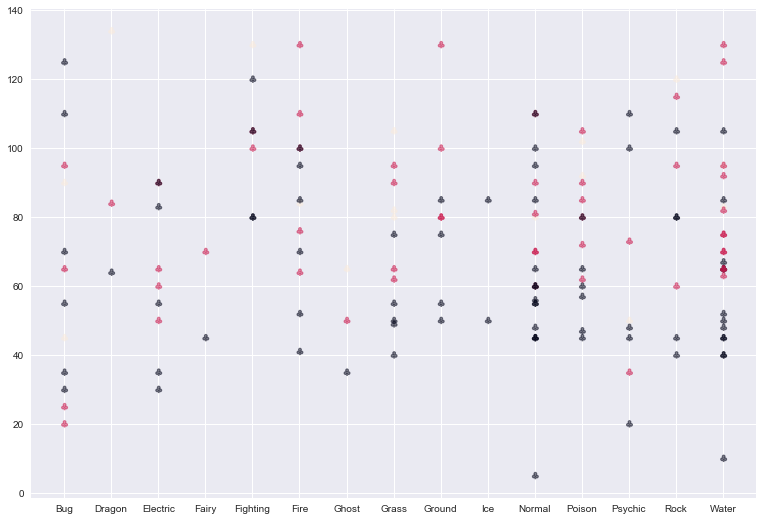

In [23]:
plt.scatter(y='Attack',x='Type 1',data=pokemon,linewidths=1,alpha=0.5,c='Stage',marker=r'$\clubsuit$')

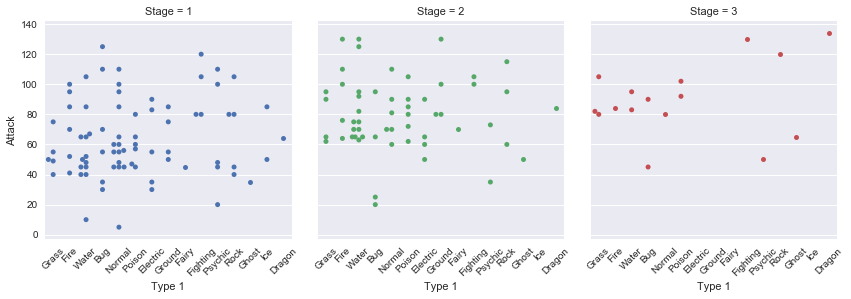

In [24]:
g=sns.factorplot(x='Type 1',y='Attack',data=pokemon,hue='Stage',kind='swarm',col='Stage')
g.set_xticklabels(rotation=45)

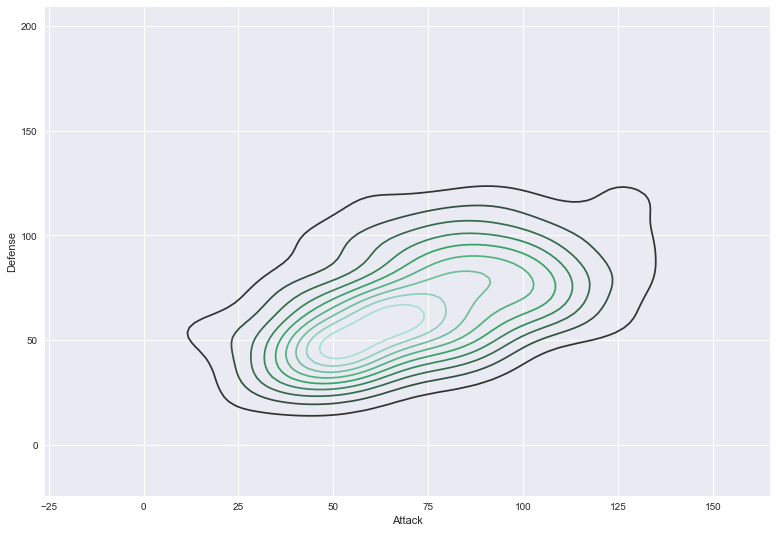

In [25]:
sns.kdeplot(pokemon.Attack,pokemon.Defense)

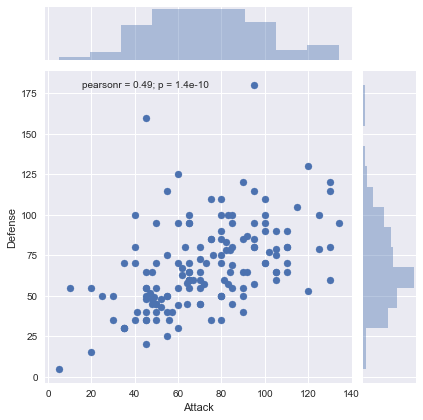

In [26]:
sns.jointplot('Attack','Defense',pokemon)